# Import ALL Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

- The data imported from the Matlab-simulink model are in **csv format**, with name as "{Fault}_noise_02.csv"
- **M** number of such files are present, coresponding to **M** faults.
- In each fault file, the fault is introduced at **t=\[1000,1500\]s** for incipient fault and **t=\[2000,2500\]s** for the step fault.

The Goal is to extract only the values of residuals between t=\[1000,1500\]s and t=\[2000,2500\]s. These values are then stored in a **new DataFrame**, which contains the residual information for all the fault classes. 

# Visualize the time evolution of ARRs

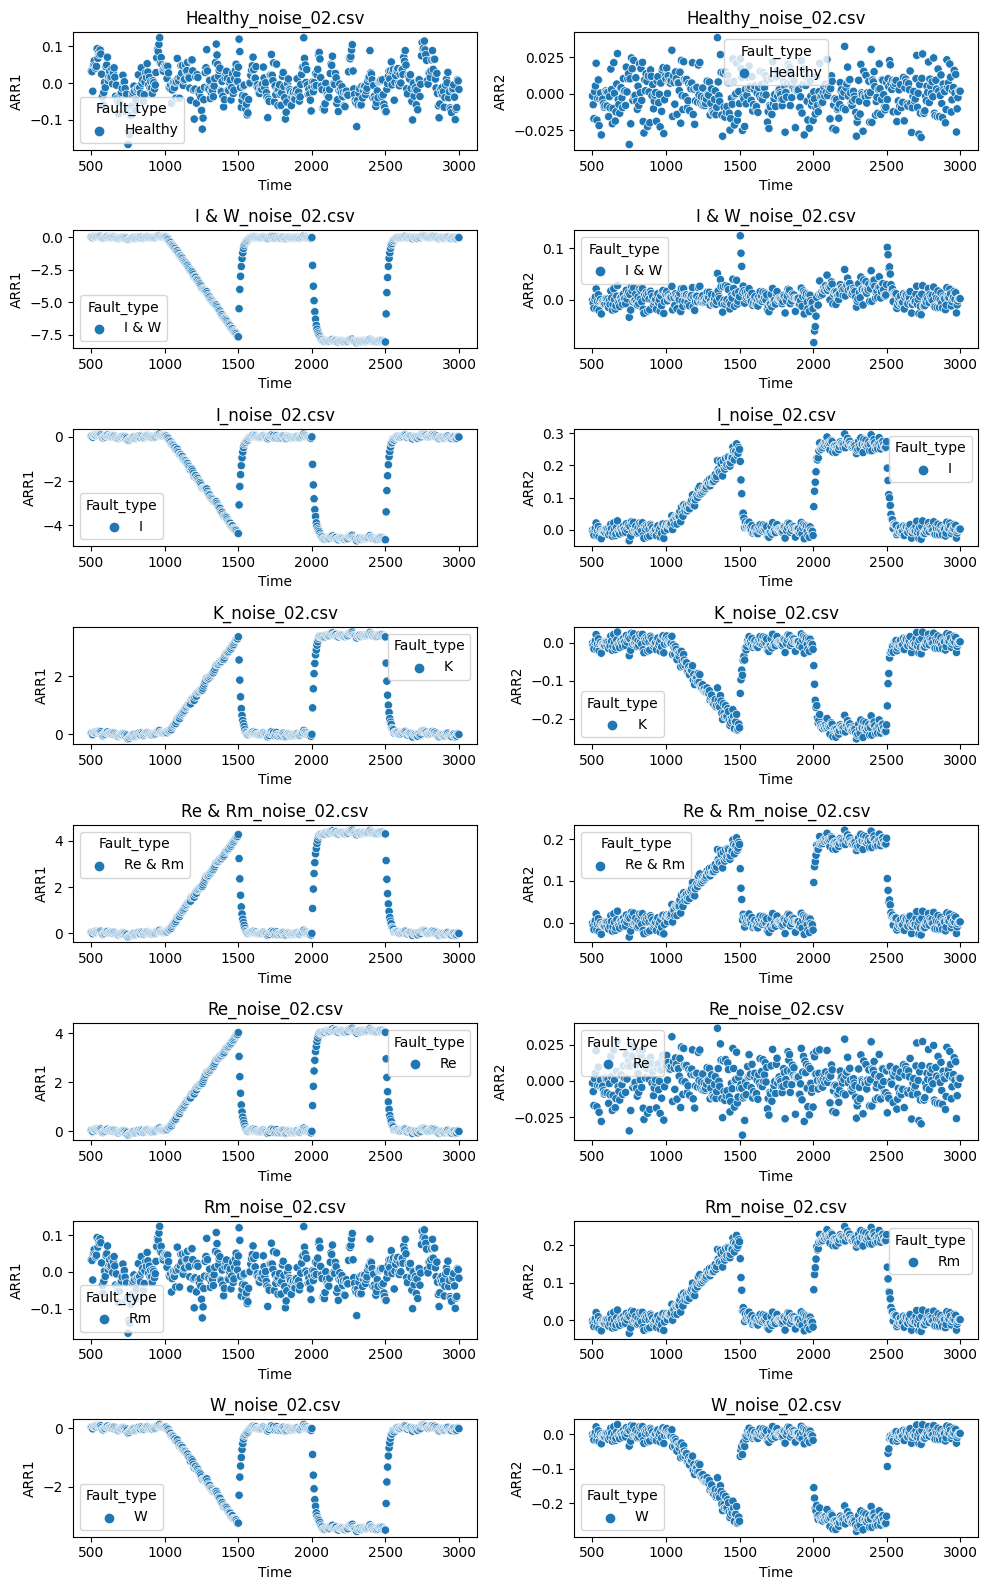

In [2]:
Path = r'.\ALL_DC_motor_Data\Ua_{}V_Noise_2_perct'.format(40) # Path of the folder containing CSV files from that working condition
file_name = os.listdir(path=Path) # List of all the files in the folder

fig, axs = plt.subplots(len(file_name), 2, figsize=(10, 2 * len(file_name)))

for i, file in enumerate(file_name):
    csv_path = os.path.join(Path, file)  # Obtains the exact path for that file
    df = pd.read_csv(csv_path)  # saves that Fault data in a dummy variable "df"
    df = df.iloc[::50]
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    sns.scatterplot(data=df, x=df['time'], y=df['ARR1'], hue=df['Fault_type'], ax=ax1)
    sns.scatterplot(data=df, x=df['time'], y=df['ARR2'], hue=df['Fault_type'], ax=ax2)
    ax1.set_title(file)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('ARR1')
    ax2.set_title(file)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('ARR2')

plt.tight_layout()
plt.show()

# Visualize time evolution of sensor data

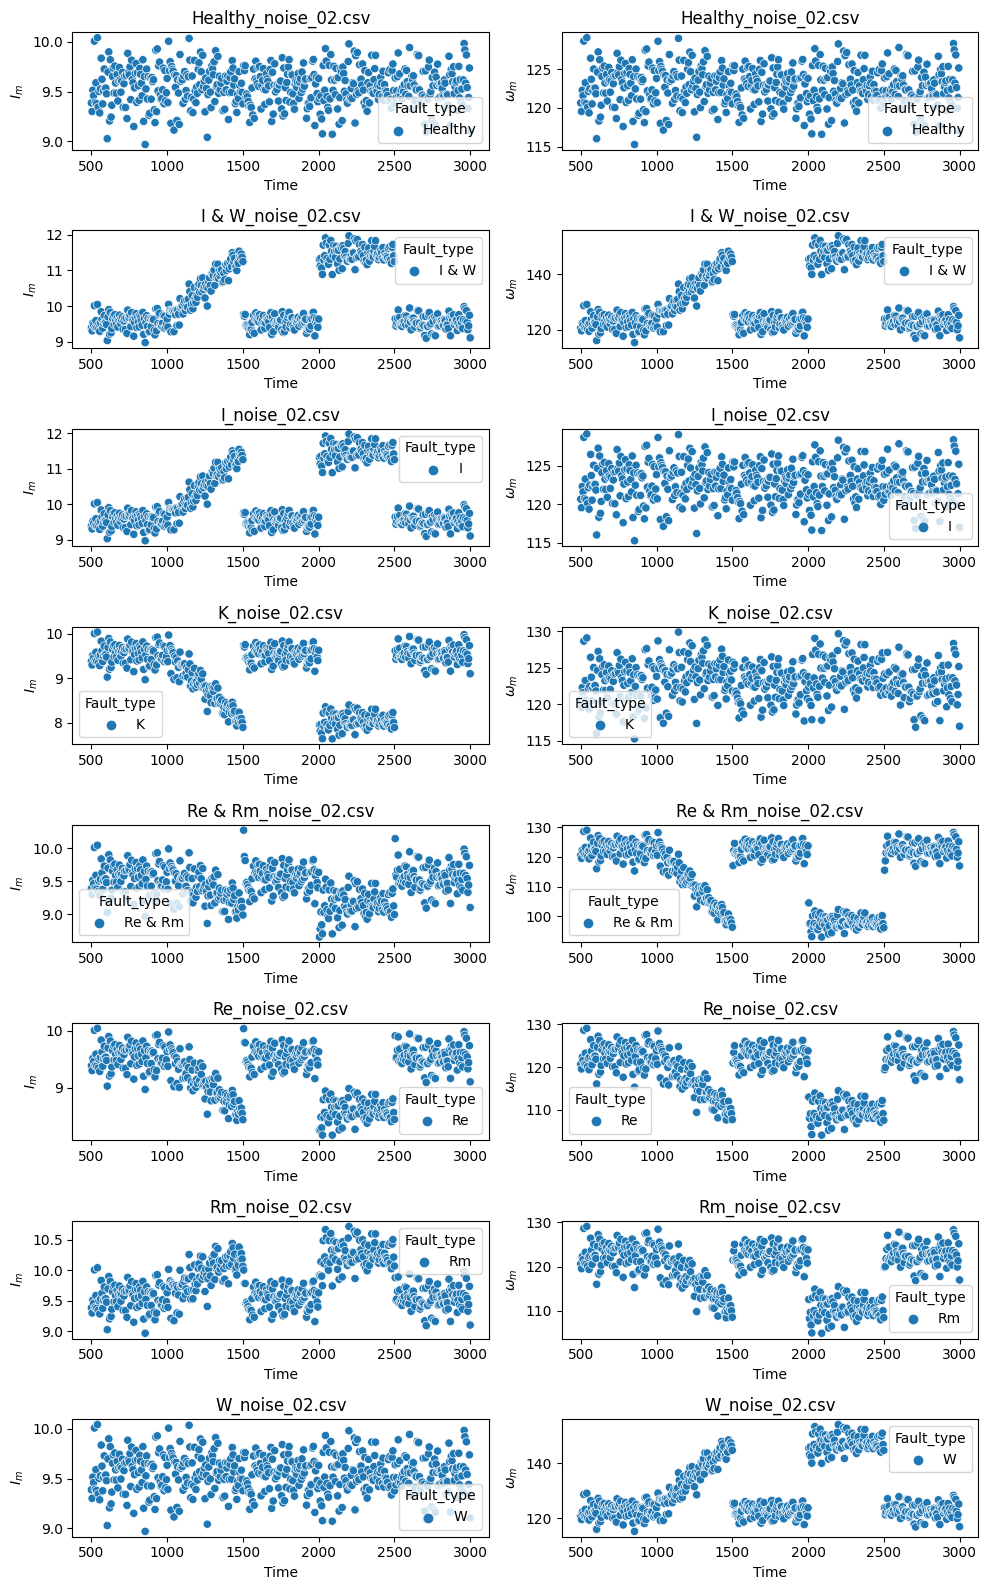

In [3]:
Path = r'.\ALL_DC_motor_Data\Ua_{}V_Noise_2_perct'.format(40) # Path of the folder containing CSV files from that working condition
file_name = os.listdir(path=Path) # List of all the files in the folder

fig, axs = plt.subplots(len(file_name), 2, figsize=(10, 2 * len(file_name)))

for i, file in enumerate(file_name):
    csv_path = os.path.join(Path, file)  # Obtains the exact path for that file
    df = pd.read_csv(csv_path)  # saves that Fault data in a dummy variable "df"
    df = df.iloc[::50]
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    sns.scatterplot(data=df, x=df['time'], y=df['Im'], hue=df['Fault_type'], ax=ax1)
    sns.scatterplot(data=df, x=df['time'], y=df['Wm'], hue=df['Fault_type'], ax=ax2)
    ax1.set_title(file)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$I_m$')
    ax2.set_title(file)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('$\omega_m$')

plt.tight_layout()
plt.show()

In [12]:


def obtain_DataFrame_for_this_working_condition(working_cond):
    # Input = "Working Condition" [40V, 80V, 120V]
    # Output = "A dataFrame contaning all fault scnerio from that Working Condition"
    
    # The DataFrame has following columns [time, I, W, ARR1, ARR2, a1_upper,  a1_lower, a2_upper,  a2_lower,  activation_arr1,  activation_arr2 FaultClass] for the given "working_cond"
    
    Path = r'.\ALL_DC_motor_Data\Ua_{}V_Noise_2_perct'.format(working_cond) # Path of the folder containing CSV files from that working condition
    file_name = os.listdir(path=Path) # List of all the files in the folder

    DF = pd.DataFrame() # Initialize an empty DataFrame
    
    for f in file_name : #Iterate through each file, which coresponds to a Fault

        csv_path =  os.path.join(Path,f) #Obtains the exact path for that file

        df = pd.read_csv(csv_path) #saves that Fault data in a dummy variable "df"
        

        temp1=df[(df.time > 1050) & (df.time< 1500)]  # Incipient-Taking samples after which the Parameter fault was introduced

        temp2=df[(df.time > 2050) & (df.time< 2500)]  # Step -Taking samples after which the Parameter fault was introduced

        df=pd.concat([temp1,temp2])                  #Concatinate both Incipient and Step Fault

        DF=pd.concat([DF,df])                        # Append the "f"-Fault to the new dataframe DF
        
    DF['Working_cond'] = np.repeat('U-{}V'.format(working_cond), len(DF))   
    return DF    
    


## Obtain all the fault data for 3 working conditions, Ua=40V, 80V, 120V

In [13]:

df_120 = obtain_DataFrame_for_this_working_condition(working_cond=120)
df_40 = obtain_DataFrame_for_this_working_condition(working_cond=40)
df_80 = obtain_DataFrame_for_this_working_condition(working_cond=80)

DF = pd.concat([df_40,df_80,df_120]) # ALL 3 working conditions are saved in one DataFRame

# Visualization of the Data

## Sensor Data

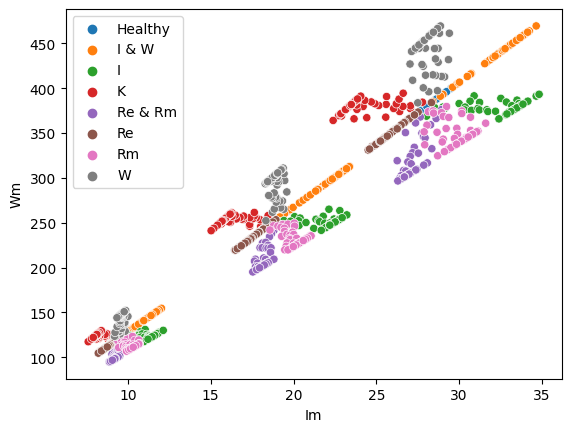

In [14]:
sns.scatterplot(data=DF.iloc[::200,:],x='Im',y='Wm',hue='Fault_type')
plt.legend()
plt.show()

## Residual Data

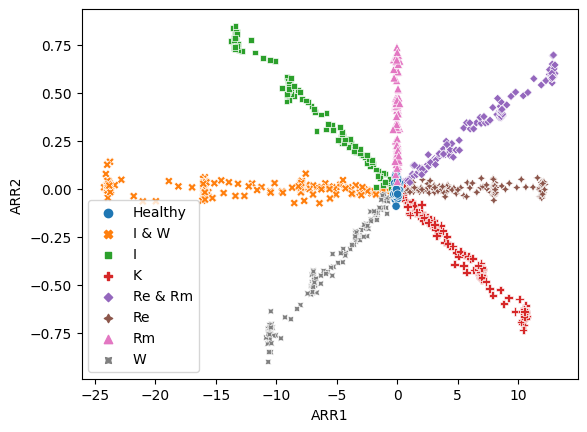

In [15]:
sns.scatterplot(data=DF.iloc[::200,:],x='ARR1',y='ARR2',style='Fault_type',hue='Fault_type')
plt.legend()
plt.show()